# A Study of Zero Emission Vehicle Population in California, United States 

---

This project is to analyze the Zero Emission Vehicle (ZEV) data in the state of California in the United States based on the vehicle population and sales across counties including number of charging facilities. 

Contents:
1. Introduction
2. Data Inspection and Cleaning
3. Exploretory Data Analysis
4. Conclusions and Discussion
5. Future Works
6. References

### **1. Introduction**

A recent report by McKinsey estimates that the global demand for Zero Emissions Vehicles (ZEVs) which include battery, fuel-cells, and plug-in hybrid Electric Vehicles (EVs) is growing to increase sixfold from 2021 through 2030 [[1](https://www.mckinsey.com/industries/automotive-and-assembly/our-insights/can-the-automotive-industry-scale-fast-enough)]. The report projects the annual global EV sales will increase from 6.5 million in 2021 to roughly 40 million by 2030. About 4% of this 2021 ZEV sales occured in state of California (CA) in United States (US) which makes it a prospective consumer market and a favorable geography that can affact ZEV sales in the coming years. It is therefore important to explore what were the key characteristcis of ZEV growth in the past decade and how they are likely going to influence the consumer demand and supply in the automotive industry within the next decade.  In this project we study the distribution on on-road ZEVs and their sales in CA, US between 2010 and 2021 to understand the success of this market segment growth across different geographical locations, automotive makers, and specific ZEV modeles.

We explore the below questions to understand the key aspects in ZEV population and sales in CA, US between 2010-2021:

1. What is the distribution of on-road vehicles by fuel type?
2. What is the ZEV population growth trend?
3. What are the top 10 ZEVs in 2021?
4. What is the County wise distribution of ZEV Charger in 2021?
5. What is the public vs private ZEV chargers and their ratio across CA?
6. How to the number of ZEVs on road compare to the previous year?
7. What is the most popular ZEV by make in over the past 10 years?
8. What is the annual ZAV sales?
9. What is the most popular Tesla model sold in year 2021?

<a id="data_cleaning"></a>
### **2. Data Inspection and Cleaning**

In this section we will import all the required python module, and datasets. Also will inspect the imported data and clean them as required in the analysis. 

### **2.1 Data Files**
For the purpose of our study we use the light-duty ZEV population and sales dataset freely available from the California Energy Commission [[2](https://www.energy.ca.gov/files/zev-and-infrastructure-stats-data)]. We prepare the dataset through necessary cleaning and transformation to carry out exploratory data analysis and visualization. In this section we summarize the key data files and attribute descriptions in relation to our study.

We use the following three data files that are publicly available at the [California Energy Commission](https://www.energy.ca.gov/) website.

1. California Energy Commission (2022). [Light-Duty Vehicle Population in California](https://www.energy.ca.gov/filebrowser/download/4335). Data last updated 04-29-2022. Retrieved 11-18-2022 from https://www.energy.ca.gov/zevstats
2. California Energy Commission (2022). [New ZEV Sales in California](https://www.energy.ca.gov/filebrowser/download/4463). Data last updated 10-18-2022. Retrieved 11-18-2022 from https://www.energy.ca.gov/zevstats
3. California Energy Commission (2022). [Electric Vehicle Chargers in California](https://www.energy.ca.gov/filebrowser/download/4554). Data last updated 01-31-2022. Retrieved 11-18-2022 from https://www.energy.ca.gov/zevstats


### **3.3 Data Terminologies**

The following is a list of data terms used in the data files as described at https://www.energy.ca.gov/zevstats

1. ZEV: Zero Emission Vehicles, includes BEVs, PHEVs, and FCEVs
2. BEV: Battery Electric Vehicle
3. PHEV: Plug-in Hybrid Electric Vehicles
4. FCEV: Fuel Cell Electric Vehicles
5. Non-ZEV: Non- Zero Emission Vehicles
6. MSA: Metropolitan Statistical Area
7. Chargers: Deliver electricity to charge the battery of a plug-in electric vehicle
8. Public chargers: Located at parking space(s) accessible by the public
9. Shared private chargers: Located at parking space(s) and accessibly by employees, tenants, visitors, and residents
10. Private chargers: Located at parking space(s) that are privately owned and operated
11. Charging Station: A physical address where one or more chargers are available for use and can be public, shared private, or private 
12. Level 1 chargers: Use alternating current (AC) electricity at 120 volts to provide about 5 miles or less of range per hour of charging
13. Level 2 chargers: Use alternating current (AC) electricity to charge a plug-in electric vehicle at 208 to 240 volts and can provide about 14 to 35 miles of range per hour of charging
14. DC Fast chargers: Use direct current (DC) electricity at 480 volts to recharge an all-battery electric vehicle to 80 percent capacity in about 30 minutes
15. Counting Method: The number of chargers represent the number of vehicles that can charge simultaneously

###  **2.4 Import required module**

Import all the modules 

In [208]:
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import table 
import numpy as np
import seaborn as sns
import geopandas as gpd
import matplotlib as mpl
sns.set_style('whitegrid')


These data set found originally in .xlsx format. They are converted to .csv format before importing. 

In [209]:
df_vehicle = pd.read_csv('Vehicle_Population.csv')
df_chargers = pd.read_csv('EV_Chargers.csv')
df_sales = pd.read_csv('ZEV_Sales.csv')

Looking a the **vechicle population** dataset

In [210]:
print(df_vehicle.shape)
print(df_vehicle.info())
print(df_vehicle.columns.is_unique)
print(df_vehicle.head())

(21887, 6)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21887 entries, 0 to 21886
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Data Year           21887 non-null  int64 
 1   County              21887 non-null  object
 2   Fuel Type           21887 non-null  object
 3   Make                18198 non-null  object
 4   Model               18198 non-null  object
 5   Number of Vehicles  21887 non-null  int64 
dtypes: int64(2), object(4)
memory usage: 1.0+ MB
None
True
   Data Year   County  Fuel Type   Make     Model  Number of Vehicles
0       2010  Alameda     Diesel    NaN       NaN               10939
1       2010  Alameda   Electric   Ford    Ranger                   3
2       2010  Alameda   Electric  Tesla  Roadster                  17
3       2010  Alameda  Flex Fuel    NaN       NaN               10974
4       2010  Alameda   Gasoline    NaN       NaN              840577


In [211]:
print(df_vehicle['Data Year'].value_counts())

2021    4087
2020    3295
2019    2907
2018    2596
2017    2242
2016    1701
2015    1384
2014    1181
2013     941
2012     669
2011     489
2010     395
Name: Data Year, dtype: int64


In this data set we have below columns that contains: 
* *Data Year:* has vehicle data from 2010 to 2021
* *County:* CA counties, has the county level population of vehicle 
* *Fuel Type:* Different fuel type includes ZEV and Non-ZEV
* *Make*: Vehicle manufacturar 
* *Model*: Model of the vehicle
* *Number of Vehicle*: Total number of vehicle 


Data cleaning for **vehicle population** dataset:

We checked for missing values in each of the columns of the dataset.

In [212]:
# Looking for missing values
print(df_vehicle.isna().any())
print(df_vehicle[df_vehicle.isna().values])


Data Year             False
County                False
Fuel Type             False
Make                   True
Model                  True
Number of Vehicles    False
dtype: bool
       Data Year   County        Fuel Type Make Model  Number of Vehicles
0           2010  Alameda           Diesel  NaN   NaN               10939
0           2010  Alameda           Diesel  NaN   NaN               10939
3           2010  Alameda        Flex Fuel  NaN   NaN               10974
3           2010  Alameda        Flex Fuel  NaN   NaN               10974
4           2010  Alameda         Gasoline  NaN   NaN              840577
...          ...      ...              ...  ...   ...                 ...
21858       2021     Yuba         Gasoline  NaN   NaN               50112
21859       2021     Yuba  Gasoline Hybrid  NaN   NaN                1562
21859       2021     Yuba  Gasoline Hybrid  NaN   NaN                1562
21860       2021     Yuba      Natural Gas  NaN   NaN                   7
21860 

Corrections:

* This dataset has missing values in **Make** and **Model** columns. For the analysis purpose we are not dropping rather will replace missing values with NA (Not Available). 
* **Fuel Type** has two categories with  *Hydrogen*. These have been corrected removing the extra whitespace. 
* **County** data has misspelled AngelesLos, corrected it with Los Angeles. 
* Removed the the data where **County** is *Out Of State*, as we will be only considering the vehicles in the state. 


In [213]:
# Replace NaN with NA
df_vehicle = df_vehicle.fillna('NA')
print(df_vehicle.isna().any())
# Replace the Hydrogen fuel type with 'Hydrogen '
print(df_vehicle['Fuel Type'].value_counts())
df_vehicle['Fuel Type'] = df_vehicle['Fuel Type'].replace(['Hydrogen '], ['Hydrogen'])
# replace county AngelesLos type with 'Los Angeles '
df_vehicle['County'] = df_vehicle['County'].replace([' AngelesLos'], ['Los Angeles'])
# drop out of state rows
out_of_county_row = df_vehicle[df_vehicle['County'] == 'Out Of State']
print(type(out_of_county_row))
df_vehicle.drop(out_of_county_row.index, inplace=True)
print(df_vehicle.shape)

Data Year             False
County                False
Fuel Type             False
Make                  False
Model                 False
Number of Vehicles    False
dtype: bool
PHEV               9621
Electric           7801
Diesel              708
Flex Fuel           708
Gasoline            708
Gasoline Hybrid     708
Natural Gas         601
Propane             594
Hydrogen            346
Hydrogen             92
Name: Fuel Type, dtype: int64
<class 'pandas.core.frame.DataFrame'>
(21372, 6)


We look at the **charger** dataset to understand general data statistics.

In [214]:
print(df_chargers.shape)
print(df_chargers.info())
print(df_chargers.columns.is_unique)
print(df_chargers.head())

(60, 8)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   County                  60 non-null     object
 1   Public Level 1          60 non-null     int64 
 2   Shared Private Level 1  60 non-null     int64 
 3   Public Level 2          60 non-null     int64 
 4   Shared Private Level 2  60 non-null     int64 
 5   Public DC Fast          60 non-null     int64 
 6   Shared Private DC Fast  60 non-null     int64 
 7   Total                   60 non-null     int64 
dtypes: int64(7), object(1)
memory usage: 3.9+ KB
None
True
      County  Public Level 1  Shared Private Level 1  Public Level 2  \
0    Alameda               6                      70            1671   
1     Alpine               0                       0              14   
2     Amador               0                       0              25   
3      Butte          

In this **charger** data set that has the count of chargers in the year of 2021, we have below columns that contains: 
* *County*: CA counties, has the county level charger count 
* *Public Level 1 Type*: Total number of public level 1 type chargers
* *Shared Private Level 1*: Total number of shared private level 1 type chargers
* *Public Level 2*: Total number of shared public level 2 type chargers
* *Shared Private Level 2*: Total number of shared private level 2 type chargers 
* *Public DC Fast*: Total number of public  DC fast chargers  
* *Shared Private DC Fast*: Total number of shared private DC fast chargers 
* *Total*: Total number of chargers in the county  


Data cleaning for **charger** dataset:

In [215]:
# Electric vehicle chargers
# check for Nan for the entire dataframe
print(df_chargers.isna().any()) # No NaN
print(df_chargers.info())
# Drop the row with Total column wise value 
total_row = df_chargers[df_chargers.County == 'Total']
print(total_row)
df_chargers.drop(total_row.index, inplace=True)
print(df_chargers.info())

County                    False
Public Level 1            False
Shared Private Level 1    False
Public Level 2            False
Shared Private Level 2    False
Public DC Fast            False
Shared Private DC Fast    False
Total                     False
dtype: bool
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   County                  60 non-null     object
 1   Public Level 1          60 non-null     int64 
 2   Shared Private Level 1  60 non-null     int64 
 3   Public Level 2          60 non-null     int64 
 4   Shared Private Level 2  60 non-null     int64 
 5   Public DC Fast          60 non-null     int64 
 6   Shared Private DC Fast  60 non-null     int64 
 7   Total                   60 non-null     int64 
dtypes: int64(7), object(1)
memory usage: 3.9+ KB
None
   County  Public Level 1  Shared Private Level 1  Publ

Data cleaning summary for **charger** data set:


* No NaN value found
* Remove the row where it is showing the total number has County name as *Total*


Data inspection for **Sales** data

In [216]:
print(df_sales.shape)
print(df_sales.columns.is_unique)
print(df_sales.info())
print(df_sales.isna().any())
print(df_sales.head())

(15287, 6)
True
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15287 entries, 0 to 15286
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Data Year           15287 non-null  int64 
 1   County              15287 non-null  object
 2   FUEL_TYPE           15287 non-null  object
 3   MAKE                15287 non-null  object
 4   MODEL               15287 non-null  object
 5   Number of Vehicles  15287 non-null  int64 
dtypes: int64(2), object(4)
memory usage: 716.7+ KB
None
Data Year             False
County                False
FUEL_TYPE             False
MAKE                  False
MODEL                 False
Number of Vehicles    False
dtype: bool
   Data Year          County FUEL_TYPE  MAKE   MODEL  Number of Vehicles
0       1998     Los Angeles  Electric  Ford  Ranger                   1
1       1998          Orange  Electric  Ford  Ranger                   1
2       1998  San Bernardino  Electr

In [217]:
print(df_sales['Data Year'].value_counts())
print(df_sales['FUEL_TYPE'].value_counts())
print(df_sales['County'].value_counts())

2022    2817
2021    2436
2020    1813
2019    1613
2018    1547
2017    1367
2016    1023
2015     843
2014     766
2013     520
2012     332
2011     122
2010      47
2009      22
2005       5
1998       4
2003       3
2002       2
1999       1
2006       1
2004       1
2001       1
2000       1
Name: Data Year, dtype: int64
PHEV        8108
Electric    6760
Hydrogen     419
Name: FUEL_TYPE, dtype: int64
Los Angeles        556
Orange             530
San Diego          496
Santa Clara        484
Alameda            474
Contra Costa       466
San Mateo          466
Riverside          457
San Francisco      453
San Bernardino     449
Ventura            445
Sacramento         430
Marin              421
Sonoma             406
Santa Barbara      392
Placer             383
Out Of State       381
Solano             367
Santa Cruz         363
Fresno             362
San Joaquin        357
Monterey           351
Kern               350
San Luis Obispo    343
Yolo               339
El Dorado      

In this **sales** data set that has the sales data for EV in the year of 2021, we have below columns that contains: 
* *Data Year*: Contains data from 1998 to 2022 
* *County*: County wise sale 
* *FUEL_TYPE*: Categories of EV sold - PHEV, Electric and Hydrogen 
* *MAKE*: Manufacturer’s name of EV
* *MODEL*: Model name of the EV
* *Number of Vehicles*: Total number of vehicles sold 
 

Cleaning of **Sales** data

In [218]:
# drop Data Year < 2010 and 2022
del_years = df_sales[(df_sales['Data Year'] < 2010)]
df_sales.drop(del_years.index, inplace=True)
del_years = df_sales[df_sales['Data Year'] == 2022]
df_sales.drop(del_years.index, inplace=True)
# Rename columns to match other data sets 
df_sales = df_sales.rename(columns = {
    'FUEL_TYPE':'Fuel Type',
    'MAKE':'Make',
    'MODEL':'Model'
})
print(df_sales.head(10))


    Data Year        County Fuel Type   Make     Model  Number of Vehicles
41       2010       Alameda  Electric   Ford    Ranger                   1
42       2010       Alameda  Electric  Tesla  Roadster                  12
43       2010        Amador  Electric   Ford    Ranger                   1
44       2010  Contra Costa  Electric  Tesla  Roadster                   9
45       2010        Fresno  Electric  Tesla  Roadster                   2
46       2010      Humboldt  Electric  Tesla  Roadster                   1
47       2010          Lake  Electric   Ford    Ranger                   1
48       2010   Los Angeles  Electric   Ford    Ranger                   2
49       2010   Los Angeles  Electric   MINI    Cooper                  61
50       2010   Los Angeles  Electric  Tesla  Roadster                 101


Data cleaning summary foe **sales** dataset: 

* This data set has sales data from 1998 to 2022. For analysis purposes and to match with other data sets, only the year rom 2010 to 2021 is considered here. 

* Renamed **FUEL_TYPE**, **MAKE** and **MODEL** columns to **Fuel Type**, **Make** and **Model**  to match with other datasets. 



### **3. Data Analysis and Questions**

### **3.1 In 2021, what was the percentage of ZEV in CA amnog the vehicles on road?** 

On road vehichles by fuel type for the year 2021 in CA

We will need only year 2021 vehicles data so filter out the data by year first. A pie chart is a good way to show the percentage of different types of fuels. As we see there are very small percentage of ZEV present so categorize them all togther so the pie chart looks meaningful. Also applied the same for the Natural Gas, Propape and Diesel fuel type. 

     Data Year        County Fuel Type   Make     Model  Number of Vehicles
1         2010       Alameda  Electric   Ford    Ranger                   3
2         2010       Alameda  Electric  Tesla  Roadster                  17
13        2010        Amador  Electric   Ford    Ranger                   1
37        2010  Contra Costa  Electric  Tesla  Roadster                  10
55        2010        Fresno  Electric  Tesla  Roadster                   2
67        2010      Humboldt  Electric   Ford    Ranger                   1
68        2010      Humboldt  Electric  Tesla  Roadster                   1
87        2010          Kern  Electric  Tesla  Roadster                   1
100       2010          Lake  Electric   Ford    Ranger                   1
111       2010   Los Angeles  Electric   Ford    Ranger                   5
       Data Year   County Fuel Type            Make             Model  \
17801       2021  Alameda  Electric            Audi            e-tron   
17802       2021  

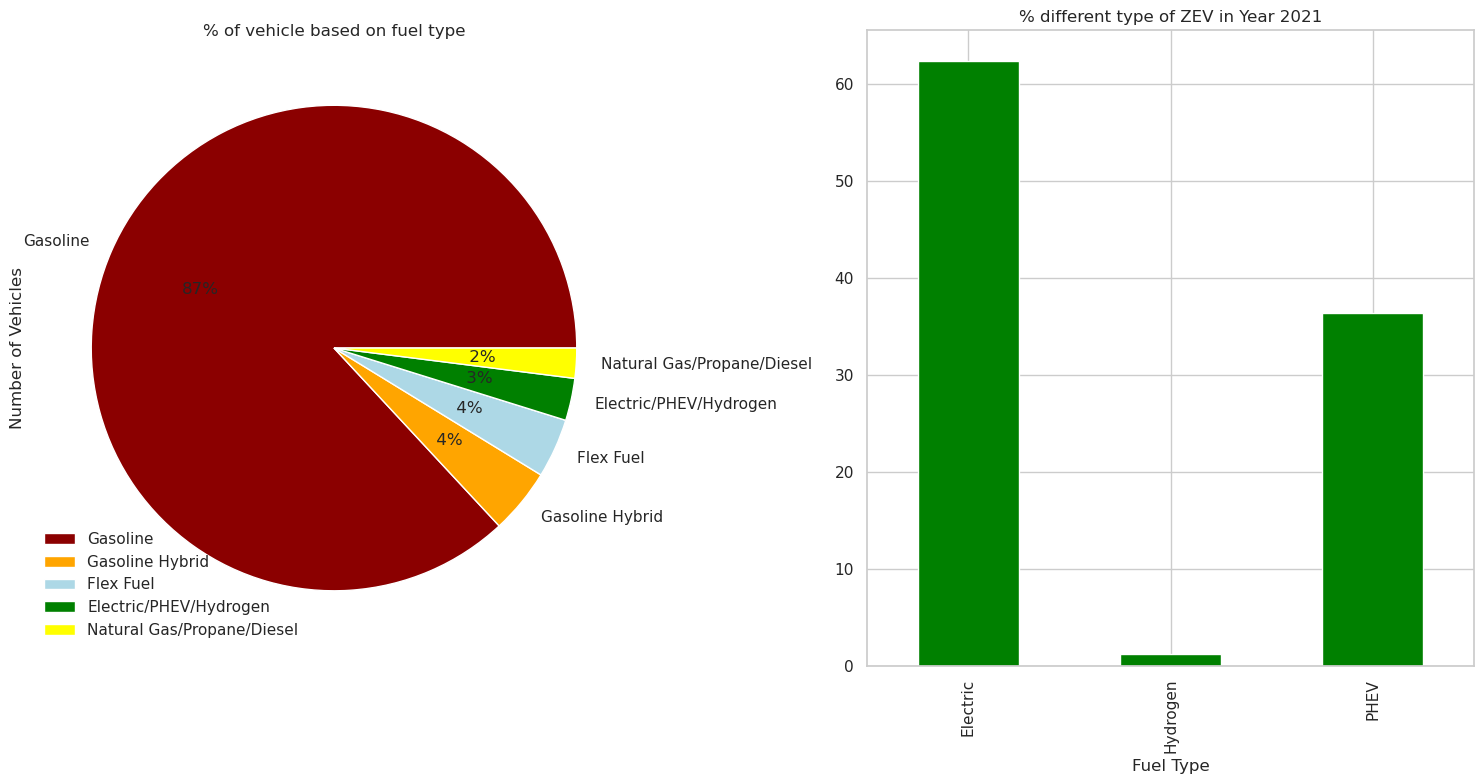

<Figure size 640x480 with 0 Axes>

In [219]:
# get only 2021 vehicle data 
df_vehicle_2021 = df_vehicle[df_vehicle['Data Year'] == 2021]
df_vehicle_2021 = df_vehicle_2021[['County','Fuel Type', 'Number of Vehicles']]

df_vehicle_2021['Fuel Type'] = df_vehicle_2021['Fuel Type'].replace(['Electric', 'PHEV', 'Hydrogen'], 'Electric/PHEV/Hydrogen')
df_vehicle_2021['Fuel Type'] = df_vehicle_2021['Fuel Type'].replace(['Natural Gas', 'Propane', 'Diesel'], 'Natural Gas/Propane/Diesel')


# get only the ZEV data for 2021
df_ZEV = df_vehicle[(df_vehicle['Fuel Type'] == 'Electric') | (df_vehicle['Fuel Type'] == 'PHEV') | (df_vehicle['Fuel Type'] == 'Hydrogen')]
print(df_ZEV.head(10))
df_ZEV_2021 = df_ZEV[df_ZEV['Data Year'] == 2021]
print(df_ZEV_2021.head())

# pie plot for 2021 vehichle population by fuel type 
vehicle_2021_fuel_type = df_vehicle_2021.groupby('Fuel Type')['Number of Vehicles'].sum().sort_values(ascending=False)

# bar plot 
ZEV_2021 = df_ZEV_2021.groupby('Fuel Type')['Number of Vehicles'].sum()
print(ZEV_2021)
df_ZEV_2021 = pd.DataFrame(ZEV_2021)
print(df_ZEV_2021)
df_ZEV_2021['%'] = (df_ZEV_2021['Number of Vehicles']/df_ZEV_2021['Number of Vehicles'].sum())*100
print(df_ZEV_2021)


# Plottting pie char and bar chart

fig, ax = plt.subplots(1,2,figsize=(15,8))

vehicle_2021_fuel_type.plot(
    kind = 'pie',
    ax = ax[0],
    y = 'Number of Vehicles',
    title = '% of vehicle based on fuel type',
    autopct = '%2.0f%%',
    colors = ['darkred','orange','lightblue','green','yellow'],
    legend = True
)
df_ZEV_2021['%'].plot(
    kind = 'bar',
    ax = ax[1],
    # subplots = True,
    title = '% different type of ZEV in Year 2021',
    color = 'green'
)
ax[0].legend(loc='lower left', frameon=False)
plt.tight_layout()
plt.show()
plt.clf()

**Answer and observation:**

As shown in the pie char above only 3% of total vehicles were ZEV that includes Electric, PHEV and Hydrogen vehicle whereas 87% were Gasoline. And in the bar chart we can see 62.38% were Electric, 36.40% PHEV and only 1.21% Hydrogen. 

### **3.2** **On road vehichles growth for different type of ZEV  over last 10  years in CA**

We will see the growth of ZEV On road over last 10 years (2010 - 2021) also the comparison between different types of ZEV (electric, PHEV and hydrogen). 

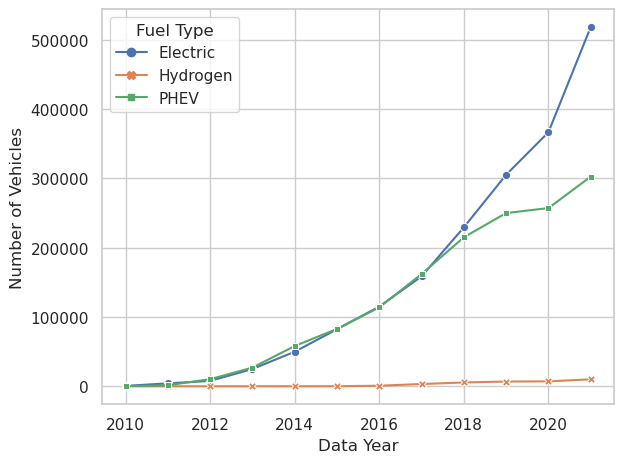

<Figure size 640x480 with 0 Axes>

In [221]:
# Group all the ZEV types - Electric, PHEV and Hydrogen
df_vehicle_ZEV = df_vehicle[(df_vehicle['Fuel Type'] == 'Electric') | (df_vehicle['Fuel Type'] == 'PHEV') | (df_vehicle['Fuel Type'] == 'Hydrogen')]
df_vehicle_ZEV_fuel_comparison_yearly = df_vehicle_ZEV.pivot_table(
    index=['Data Year', 'Fuel Type'],
    values='Number of Vehicles',
    aggfunc='sum'
)

# Line plotting different types of ZEV 
# fig, ax = plt.subplots()
sns.lineplot( 
    data=df_vehicle_ZEV_fuel_comparison_yearly, #sns
    x='Data Year', 
    y='Number of Vehicles',
    hue='Fuel Type',
    markers=True, #sns
    style='Fuel Type', #sns
    dashes=False, #sns
    sizes=(12,8)
)  
# plt.grid() 
plt.tight_layout()
plt.show()
plt.clf()

**Answer and observation:**

Over the 10 years from 2010, there are incremental growth for all the types of ZEV. For Electric vehicle there is a sharp rise after year 2020. Although we observe a decrease for PHEV in year 2018 to 2019 then increase again.Whereas for Hydrogen vehicle it's a very minimal growth.

### **3.3** **Top 10 ZEV in  2021**

top_ZEV
Make
Tesla         1105049
Chevrolet      555557
Toyota         423035
Ford           287754
Nissan         262948
BMW            200748
FIAT            94341
Honda           83737
Volkswagen      58312
Audi            46360
Name: Number of Vehicles, dtype: int64


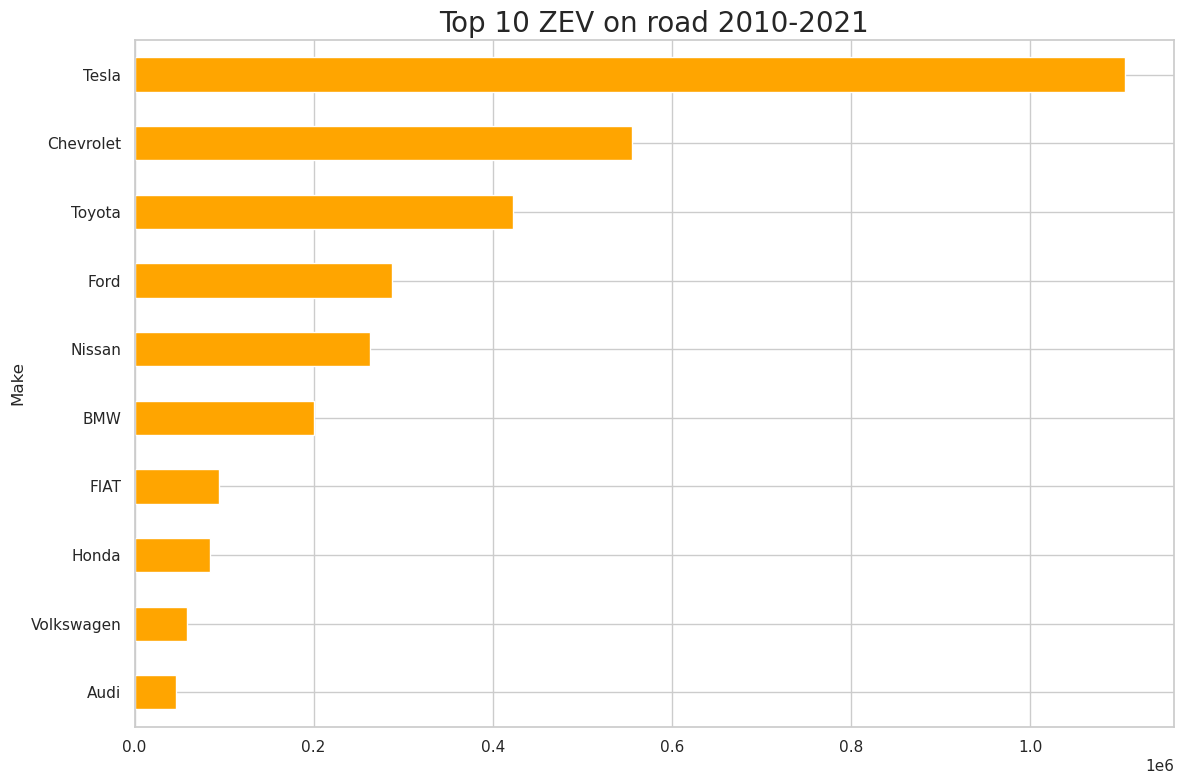

<Figure size 640x480 with 0 Axes>

In [222]:
# Top 20 ZEV over last 10 year by Make
top_ZEV = df_vehicle_ZEV.groupby('Make')['Number of Vehicles'].sum().sort_values(ascending=False)
print('top_ZEV')
top_ZEV_10 = top_ZEV.sort_values(ascending=False)
top_ZEV_10 = top_ZEV_10.head(10)
print(top_ZEV_10)
top_ZEV_10 = top_ZEV_10.sort_values(ascending=True)
top_ZEV_10.plot(
    kind = 'barh',
    figsize = [12,8],
    color = 'orange'
)
plt.title('Top 10 ZEV on road 2010-2021', fontsize=20)
plt.tight_layout()
plt.show()
plt.clf()


### **3.4** **What is the County wise distribution of ZEV Charger in 2021?**

In [223]:
# new df with charger and number of vehicles in county in 2021
# df_vehicle_EV = df_vehicle[(df_vehicle['Fuel Type'] == 'Electric') | (df_vehicle['Fuel Type'] == 'PHEV')|(df_vehicle['Fuel Type'] == 'Hydrogen')]
df_vehicle_2021 = df_vehicle_ZEV[df_vehicle_ZEV['Data Year'] == 2021]
df_vehicle_charger_2021 = df_vehicle_2021.merge(df_chargers, how='left', on='County')
print(df_vehicle_charger_2021.info())
print(df_vehicle_charger_2021)
print(df_vehicle_charger_2021.isna().any())
print(df_vehicle_charger_2021[df_vehicle_charger_2021.isna().any(axis=1)])
df_vehicle_charger_2021.to_csv('df_vehicle_charger_2021.csv')

county_ZEV_count = df_vehicle_2021.pivot_table(
    index=['County'],
    values='Number of Vehicles',
    aggfunc='sum'
)
county_ZEV_count = county_ZEV_count.sort_values('County')
# print(county_ZEV_count.sort_values('County'))
# Join county charger with county count of ZEV
df_county_charger = county_ZEV_count.merge(df_chargers, how='left', on='County')
print(df_county_charger.info())
print(df_county_charger.head(10))
print(df_county_charger.isna().any())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3686 entries, 0 to 3685
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Data Year               3686 non-null   int64 
 1   County                  3686 non-null   object
 2   Fuel Type               3686 non-null   object
 3   Make                    3686 non-null   object
 4   Model                   3686 non-null   object
 5   Number of Vehicles      3686 non-null   int64 
 6   Public Level 1          3686 non-null   int64 
 7   Shared Private Level 1  3686 non-null   int64 
 8   Public Level 2          3686 non-null   int64 
 9   Shared Private Level 2  3686 non-null   int64 
 10  Public DC Fast          3686 non-null   int64 
 11  Shared Private DC Fast  3686 non-null   int64 
 12  Total                   3686 non-null   int64 
dtypes: int64(9), object(4)
memory usage: 403.2+ KB
None
      Data Year   County Fuel Type            Make      

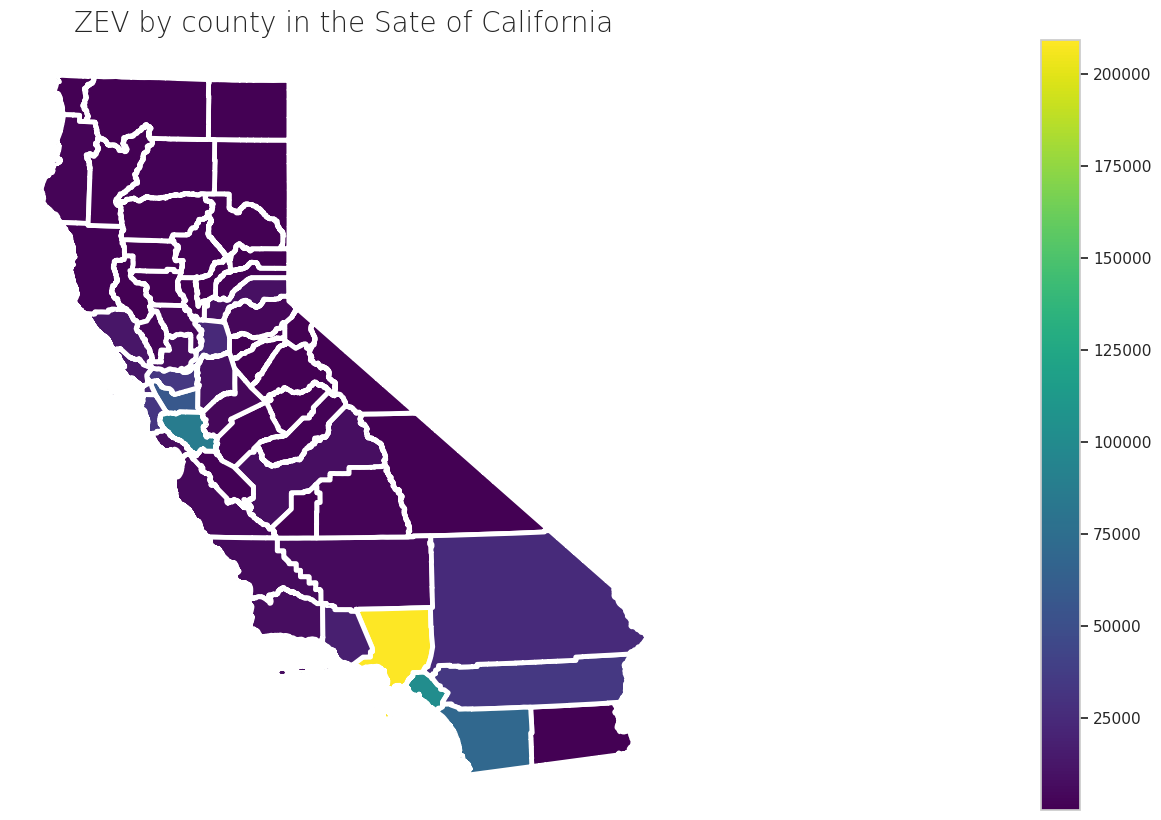

<Figure size 640x480 with 0 Axes>

In [224]:
# Import and clean map data
from mpl_toolkits.axes_grid1 import make_axes_locatable
ca = gpd.read_file('cnty24k09_1_multipart.shp')
ca = ca.sort_values('NAME_PCASE', ascending=True)
ca = ca.reset_index(drop=True)


df_county_total_vehicle = df_county_charger[['County', 'Number of Vehicles']]
df_county = df_county_total_vehicle.reset_index(drop=True)

# Join map data with county wise number of vehicle 
combined_df = ca.join(df_county)

fig, ax = plt.subplots(1, figsize=(20,10))
ax.axis('off')
ax.set_title('ZEV by county in the Sate of California',
             fontdict={'fontsize': '20', 'fontweight': '10'})

v_min = df_county_charger['Number of Vehicles'].min() 
v_max = df_county_charger['Number of Vehicles'].max()
# bounds = [(lambda x: x)(x) for x in range (0, 200000, 100)]
sm = plt.cm.ScalarMappable(cmap='viridis', norm=plt.Normalize(vmin=v_min,vmax=v_max))
cbar = fig.colorbar(sm)
divider = make_axes_locatable(ax)
combined_df.plot(column='Number of Vehicles', cmap='viridis', linewidth=3.5, ax=ax)
plt.show()
plt.clf()

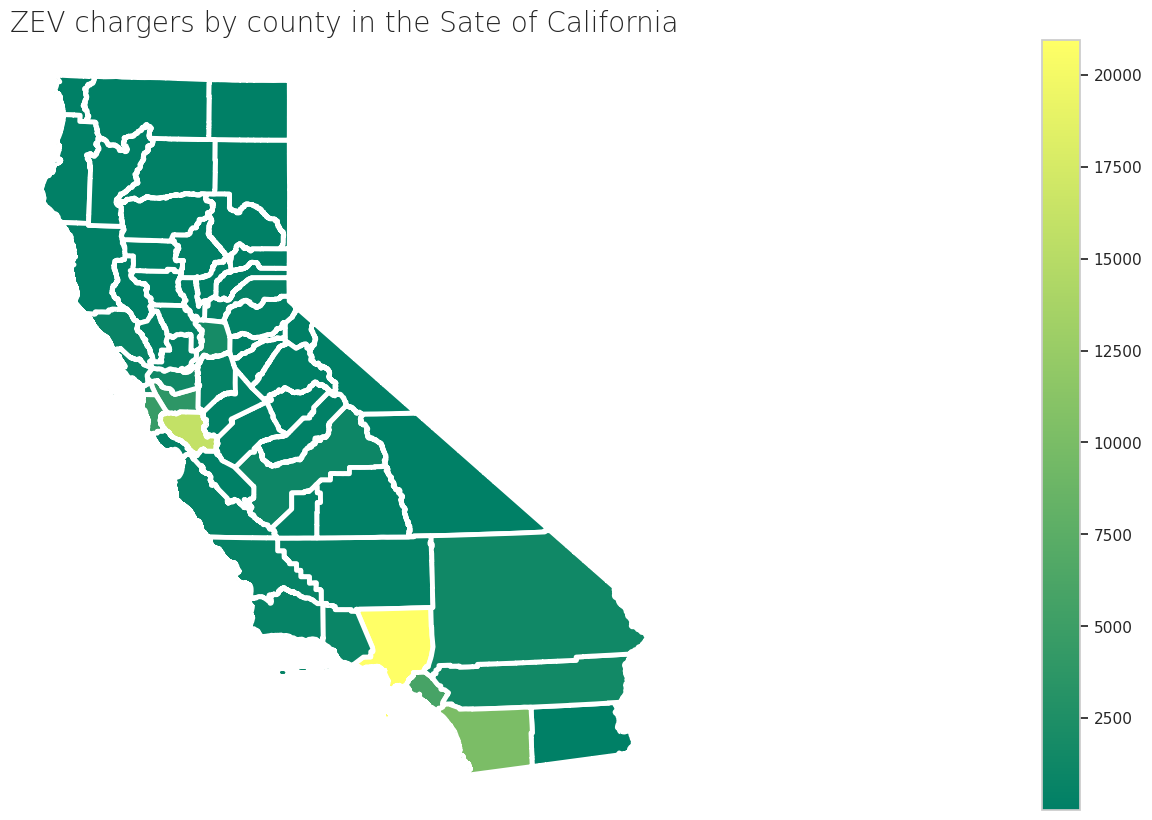

<Figure size 640x480 with 0 Axes>

In [225]:
from mpl_toolkits.axes_grid1 import make_axes_locatable
ca = gpd.read_file('cnty24k09_1_multipart.shp')
ca = ca.sort_values('NAME_PCASE', ascending=True)
ca = ca.reset_index(drop=True)
# print(ca.head(30))

df_county_total_vehicle = df_county_charger[['County', 'Total']]
df_county = df_county_total_vehicle.reset_index(drop=True)

combined_df = ca.join(df_county)

fig, ax = plt.subplots(1, figsize=(20,10))
ax.axis('off')
ax.set_title('ZEV chargers by county in the Sate of California',
             fontdict={'fontsize': '20', 'fontweight': '10'})

v_min = df_county_charger['Total'].min() 
v_max = df_county_charger['Total'].max()
# bounds = [(lambda x: x)(x) for x in range (0, 200000, 100)]
sm = plt.cm.ScalarMappable(cmap='summer', norm=plt.Normalize(vmin=v_min,vmax=v_max))
cbar = fig.colorbar(sm)
divider = make_axes_locatable(ax)
combined_df.plot(column='Total', cmap='summer', linewidth=3.5, ax=ax)
# combined_df.boundary.plot()
plt.show()
plt.clf()

**Ratio calculation** 

In [226]:
# Calculate the ratio of the chargers across counties

df_county_charger['Ratio'] = df_county_charger['Total']/df_county_charger['Number of Vehicles']
df_county_charger['Ratio'] = (df_county_charger['Ratio']*100).round(3)

county_ratio = df_county_charger[['County', 'Number of Vehicles' , 'Total', 'Ratio']]
# See the highest ratio
print(county_ratio.sort_values('Ratio', ascending=False).head(10))


       County  Number of Vehicles  Total    Ratio
24      Modoc                   7     12  171.429
1      Alpine                  20     14   70.000
17     Lassen                  26     13   50.000
5      Colusa                  76     38   50.000
46   Siskiyou                 167     72   43.114
13       Inyo                 124     42   33.871
15      Kings                 639    204   31.925
25       Mono                 102     32   31.373
7   Del Norte                 110     29   26.364
21   Mariposa                 108     24   22.222


In [227]:
county_ratio = county_ratio.sort_values('Number of Vehicles', ascending=False)
county_ratio_top_20 = county_ratio.head(20)
county_ratio_top_20 = county_ratio_top_20.reset_index()
county_ratio_top_20 = county_ratio_top_20.set_index('County')
print(county_ratio_top_20[['Number of Vehicles', 'Ratio']])

                Number of Vehicles   Ratio
County                                    
Los Angeles                 209205  10.014
Orange                      101782   5.750
Santa Clara                  86809  18.416
San Diego                    70095  14.380
Alameda                      57033   6.482
Riverside                    33888   4.568
Contra Costa                 33850   4.287
San Mateo                    32424  13.913
San Bernardino               25249   5.414
Sacramento                   23750   7.634
San Francisco                21822   7.470
Ventura                      17530   5.100
Marin                        12369   5.975
Sonoma                       12242   6.486
San Joaquin                   8910   4.961
Placer                        8805   4.759
Fresno                        7704  14.707
Solano                        7131   6.605
Santa Barbara                 6938   8.028
Santa Cruz                    6730   4.562


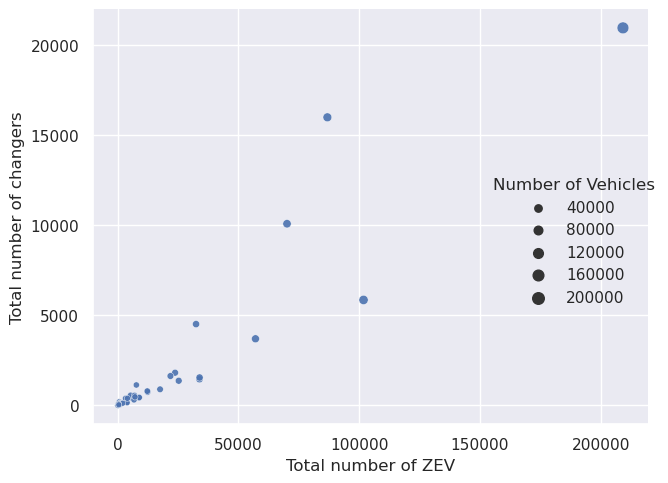

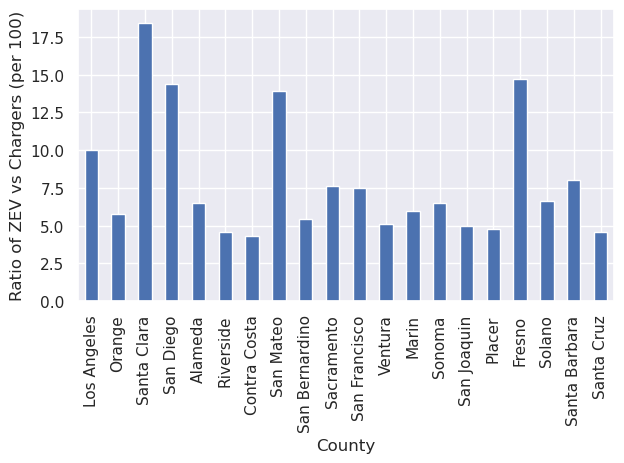

<Figure size 640x480 with 0 Axes>

In [228]:
# plotting 
sns.set()


ax = sns.relplot(
    data=df_county_charger,
    # ax = ax[0],
    x=df_county_charger['Number of Vehicles'],
    y=df_county_charger['Total'],
    size=df_county_charger['Number of Vehicles'],
    # sizes = (50,500),
    alpha = 0.9
)


   
# ax[0].set(xlabel = 'Total number of ZEV', ylabel = 'Total number of changers')
ax.set(xlabel = 'Total number of ZEV', ylabel = 'Total number of changers')
# ax[1].set(ylabel = 'Ratio of ZEV vs Chargers (per 100)')
plt.tight_layout()
plt.show()
plt.clf()

ax = county_ratio_top_20['Ratio'].plot(
    kind = 'bar',
)
ax.set(ylabel = 'Ratio of ZEV vs Chargers (per 100)')
plt.tight_layout()
plt.show()
plt.clf()

**Answer and observation:**

From the above scatter plot we clearly see that there is a strong relation between the number of charges and number of ZEVs in the counties. We also notice that few counties has much higher number of chargers than toal ZEV in the county. 

From the bar graph we observe the % ratio of chargers and ZEV population among the counties. From the data we observe although Los Angeles county has the most number of ZEV but for 100 ZEV is only 10.0 whereas for the counties with less vehicles for example Santa Clara, San Diego, San Mateo, Fresco has much higher chargers available.

From the ratio we also observed that few counties for example Modoc, Alpine and Lassen has much higher chargers than vehicle, more than 10 chargers for 20 or less ZEV. 

### **3.5 Public vs Private ZEV chargers and their ratio**

                Total Number
Charger Type                
Public                 35594
Shared Private         43429


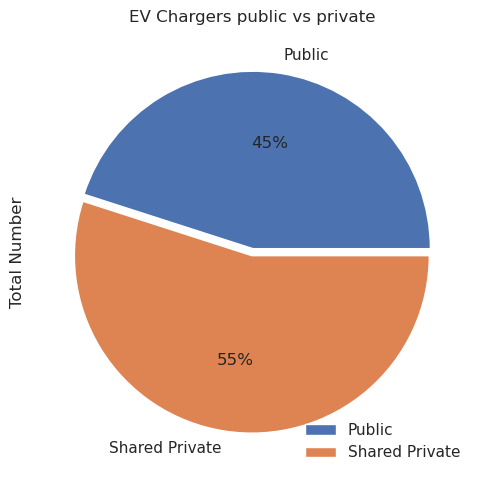

<Figure size 640x480 with 0 Axes>

In [261]:
df_chargers['Total Public'] = df_chargers['Public DC Fast'] + df_chargers['Public Level 2'] + df_chargers['Public Level 1']
df_chargers['Total Shared Private'] = df_chargers['Shared Private Level 1'] + df_chargers['Shared Private Level 2'] + df_chargers['Shared Private DC Fast']
df_chargers['Total'] = df_chargers['Total Public'] + df_chargers['Total Shared Private']
df_chargers = df_chargers.sort_values('Total', ascending=False)
df_chargers_total = df_chargers[['County', 'Total Public', 'Total Shared Private', 'Total']]
# print(df_chargers_total.head(20))
total_public_chargers = df_chargers_total['Total Public'].sum()
# print('Total Public = ', total_public_chargers)
total_shared_private_chargers = df_chargers_total['Total Shared Private'].sum()
# print('Total Shared Private = ', total_shared_private_chargers)

total_list = {
'Charger Type': ['Public', 'Shared Private'],
'Total Number': [total_public_chargers, total_shared_private_chargers]
}
df_total = pd.DataFrame(total_list)
df_total = df_total.set_index('Charger Type')
print(df_total)

df_total.plot(
    kind = 'pie',
    y = 'Total Number',
    title = 'EV Chargers public vs private',
    autopct = '%1.0f%%',
    explode = (0.02, 0.02),
    figsize = (10,5),
    legend = True
)
plt.legend(loc='lower right', frameon=False)
plt.tight_layout()
plt.show()
plt.clf()


**Answer and observation:**

From the above plot we observe that 55% chargers are shared private and 45% are public.

### **3.6** **Annual ZEV on the road comparing last year (2020-2021)**

**Annual ZEV on the road**

after fillna:  Number of Vehicles 2021    False
Number of Vehicles 2020    False
dtype: bool
Combine 2020 2021
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 5 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Make                     41 non-null     object 
 1   Number of Vehicles 2021  41 non-null     int64  
 2   Number of Vehicles 2020  41 non-null     int64  
 3   Change                   41 non-null     int64  
 4   % Change                 41 non-null     float64
dtypes: float64(1), int64(3), object(1)
memory usage: 1.7+ KB
None
          Make  Number of Vehicles 2021  Number of Vehicles 2020  Change  \
0         Audi                    16496                    10929    5567   
2          BMW                    44393                    38457    5936   
3      Bentley                       44                       28      16   
4     Cadillac                      66

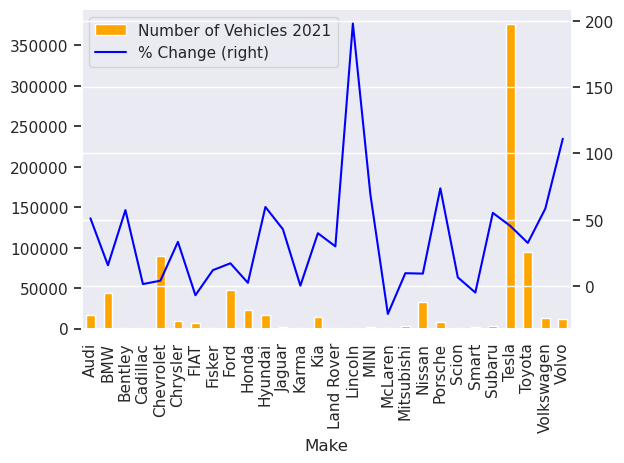

<Figure size 640x480 with 0 Axes>

In [229]:
# Comparison between 2020 and 2021
df_ZEV_2020 = df_vehicle_ZEV[df_vehicle_ZEV['Data Year'] == 2020]
df_ZEV_2021 = df_vehicle_ZEV[df_vehicle_ZEV['Data Year'] == 2021]
# ZEV_2020 = df_ZEV_2021.groupby('Make')['Number of Vehicles'].sum()
ZEV_2020 = df_ZEV_2020.pivot_table(
    index = 'Make',
    values = 'Number of Vehicles',
    aggfunc= 'sum'
)
ZEV_2021 = df_ZEV_2021.pivot_table(
    index = 'Make',
    values = 'Number of Vehicles',
    aggfunc= 'sum'
)
combine_ZEV_2020_2021 = ZEV_2021.merge(ZEV_2020, how='left', on='Make')

combine_ZEV_2020_2021 = combine_ZEV_2020_2021.rename(columns = {
    'Number of Vehicles_x':'Number of Vehicles 2021',
    'Number of Vehicles_y':'Number of Vehicles 2020'
})
# check for Nan
# print(combine_ZEV_2020_2021.isna().any())
# combine_ZEV_2020_2021['Number of Vehicles 2020'] = combine_ZEV_2020_2021['Number of Vehicles 2020'].astype('int64')

combine_ZEV_2020_2021['Number of Vehicles 2020'] = combine_ZEV_2020_2021['Number of Vehicles 2020'].fillna(0)

print('after fillna: ', combine_ZEV_2020_2021.isna().any())
combine_ZEV_2020_2021 = combine_ZEV_2020_2021.apply(np.int64)
print('Combine 2020 2021')

combine_ZEV_2020_2021['Change'] = combine_ZEV_2020_2021['Number of Vehicles 2021'] - combine_ZEV_2020_2021['Number of Vehicles 2020']
combine_ZEV_2020_2021['% Change'] = (combine_ZEV_2020_2021['Change'] / combine_ZEV_2020_2021['Number of Vehicles 2020']) * 100
combine_ZEV_2020_2021 = combine_ZEV_2020_2021.reset_index()
print(combine_ZEV_2020_2021.info())
# print(combine_ZEV_2020_2021.sort_values('Change', ascending=False))
filtered_ZEV_2020_2021 = combine_ZEV_2020_2021[combine_ZEV_2020_2021['Number of Vehicles 2020'] != 0]
filtered_ZEV_2020_2021_2 = combine_ZEV_2020_2021[combine_ZEV_2020_2021['% Change'] < 200]
# print(filtered_ZEV_2020_2021.sort_values('% Change', ascending=False))
print(filtered_ZEV_2020_2021)

# Bar plot for ZEV in 2021
fig, ax = plt.subplots()
filtered_ZEV_2020_2021_2.plot(
    # use_index=True,
    kind='bar',
    x='Make',
    y='Number of Vehicles 2021',
    ax=ax,
    color='orange'
)

# Line plot for the variance 
filtered_ZEV_2020_2021_2.plot(
    x='Make',
    y='% Change',
    ax=ax,
    secondary_y=True,
    color='blue'
)
ax.set_xticklabels(ax.get_xticks(), rotation=90)
ax.set_xticklabels(filtered_ZEV_2020_2021_2['Make'])
plt.tight_layout()
plt.show()
plt.clf()

            % Change
Make                
Audi       50.937872
BMW        15.435421
Bentley    57.142857
Cadillac    1.212121
Chevrolet   3.751046


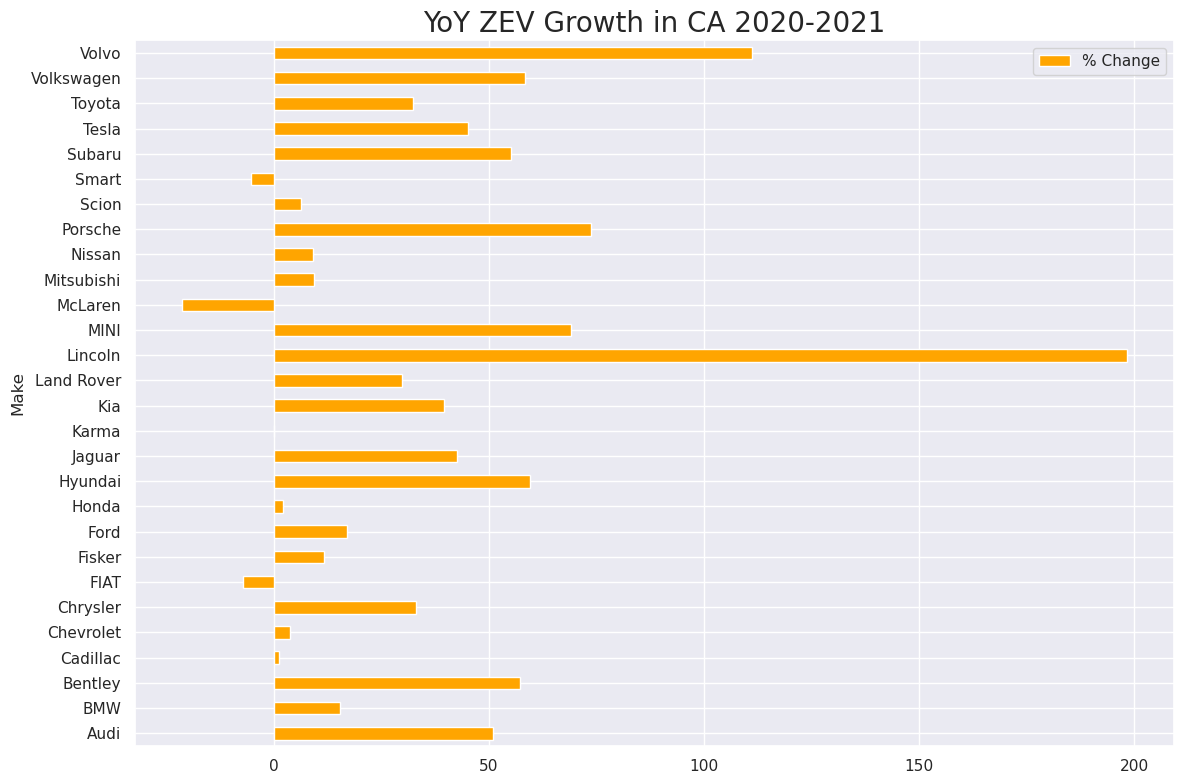

<Figure size 640x480 with 0 Axes>

In [230]:
filtered_ZEV_2020_2021_3 = filtered_ZEV_2020_2021_2[['Make', '% Change']]
filtered_ZEV_2020_2021_3 = filtered_ZEV_2020_2021_3.set_index('Make')
print(filtered_ZEV_2020_2021_3.head())
filtered_ZEV_2020_2021_3.plot(
    kind = 'barh',
    # subplots = True,
    figsize = [12,8],
    color = 'orange',
    # grid = True
)
plt.title('YoY ZEV Growth in CA 2020-2021', fontsize=20)
plt.tight_layout()
plt.show()
plt.clf()

**Result and observation:**
Comparing 2020 and 2021, Smart, McLaren, FIAT has a negative growth where as most of the other has positive growth considering Volvo, Lincoln has more than 100% increased growth. 

### **3.7 What is the most popular ZEV by make in over the last 10 years?**

top_ZEV
Make
Tesla        1105049
Chevrolet     555557
Toyota        423035
Ford          287754
Nissan        262948
Name: Number of Vehicles, dtype: int64
top_ZEV in 2021
Make
Tesla        376250
Toyota        94930
Chevrolet     89284
Ford          47177
BMW           44393
Name: Number of Vehicles, dtype: int64
Make
Jaguar             2009
Mitsubishi         2523
Subaru             3438
Jeep               4718
Mercedes-Benz      7300
FIAT               7390
Porsche            7431
Chrysler           9038
Volvo             12138
Volkswagen        13377
Kia               14165
Audi              16496
Hyundai           16590
Honda             22316
Nissan            32633
BMW               44393
Ford              47177
Chevrolet         89284
Toyota            94930
Tesla            376250
Name: Number of Vehicles, dtype: int64


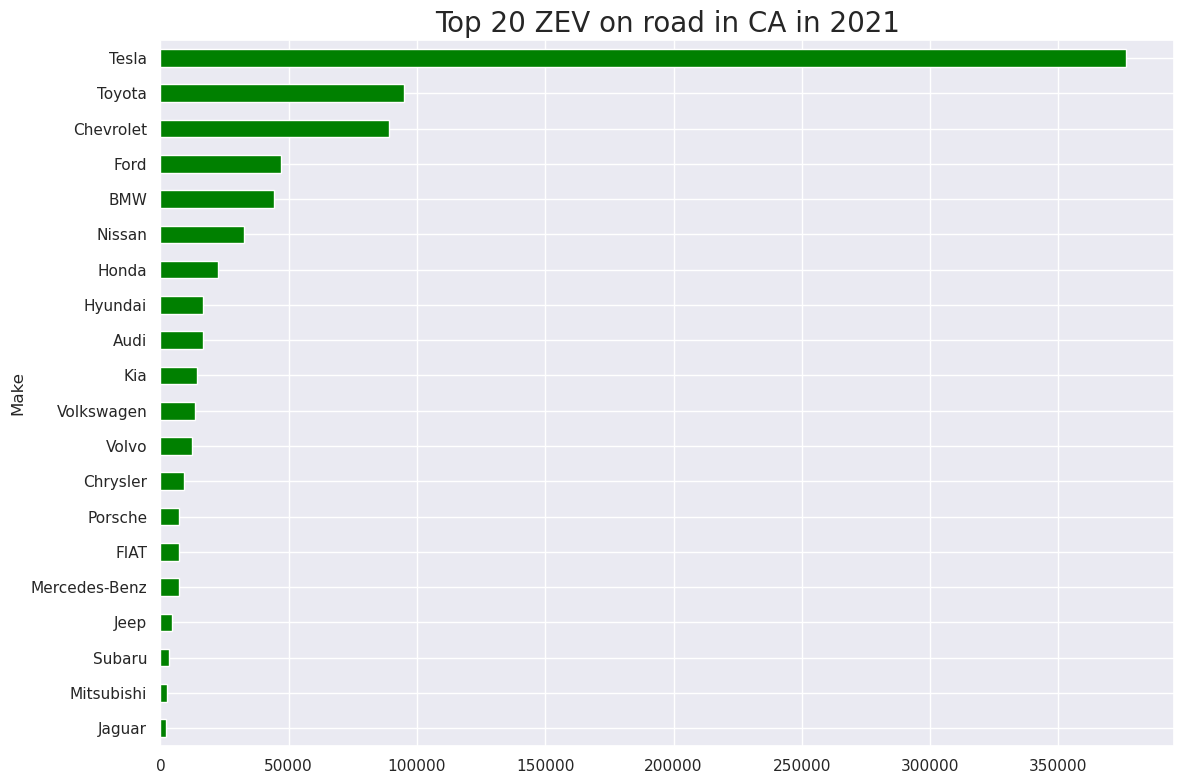

<Figure size 640x480 with 0 Axes>

In [231]:
# Top 20 ZEV over last 10 year by Make
top_ZEV = df_vehicle_ZEV.groupby('Make')['Number of Vehicles'].sum().sort_values(ascending=False)
print('top_ZEV')
print(top_ZEV.head(5))

#Top 20 ZEV in 2021 by Make
df_ZEV_2021 = df_vehicle_ZEV[df_vehicle_ZEV['Data Year'] == 2021]
ZEV_2021 = df_ZEV_2021.groupby('Make')['Number of Vehicles'].sum()
top_ZEV_2021= ZEV_2021.sort_values(ascending=False)
print('top_ZEV in 2021')
print(top_ZEV_2021.head(5))
top_20_ZEV_2021 = top_ZEV_2021.head(20)
top_20_ZEV_2021 = top_20_ZEV_2021.sort_values()
print(top_20_ZEV_2021)

top_20_ZEV_2021.plot(
    kind = 'barh',
    # subplots = True,
    figsize = [12,8],
    color = 'green'
)
plt.title('Top 20 ZEV on road in CA in 2021', fontsize=20)
plt.tight_layout()
plt.show()
plt.clf()


**Answer and observation:**

Testla clearly is dominant ZEV in California over the last 10 years. Other than Tesla, Tyota, Checvrolet, FOr, BMW are on top of the list. 

### **3.8** **Annual ZEV sales**

In [232]:
# Top 10 ZEV car make over 10 years

top_10 = df_sales.pivot_table(
    index=['Make'],
    values='Number of Vehicles',
    aggfunc=sum
)

top_10 = top_10.sort_values('Number of Vehicles', ascending=False)
print('Top 10 sold vehicle by make')
print(top_10.head(10))

Top 10 sold vehicle by make
            Number of Vehicles
Make                          
Tesla                   422707
Chevrolet               138586
Toyota                  106963
BMW                      76986
Nissan                   57595
Ford                     57108
FIAT                     29813
Honda                    27989
Volkswagen               20580
Hyundai                  17826


In [233]:
df_sales_by_make = df_sales.pivot_table(
    index=['Data Year'],
    columns=['Make'],
    values='Number of Vehicles',
    aggfunc=sum
)
df_sales_by_make = df_sales_by_make.reset_index()
print(df_sales_by_make.info())

subset = df_sales_by_make[['Data Year', 'Tesla', 'Chevrolet', 'Toyota', 'BMW']]
subset = subset.fillna(0)
subset = subset.reset_index()
subset = subset.iloc[:, 1:]
print(subset.isna().any())
print(subset.head(10))
print(subset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 36 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Data Year      12 non-null     int64  
 1   Audi           6 non-null      float64
 2   BMW            11 non-null     float64
 3   Bentley        2 non-null      float64
 4   Cadillac       7 non-null      float64
 5   Chevrolet      12 non-null     float64
 6   Chrysler       5 non-null      float64
 7   FIAT           9 non-null      float64
 8   Ferrari        1 non-null      float64
 9   Fisker         4 non-null      float64
 10  Ford           12 non-null     float64
 11  Honda          12 non-null     float64
 12  Hyundai        8 non-null      float64
 13  Jaguar         4 non-null      float64
 14  Jeep           1 non-null      float64
 15  Karma          5 non-null      float64
 16  Kia            8 non-null      float64
 17  Land Rover     3 non-null      float64
 18  Lincoln     

/tmp/ipykernel_93/2910980089.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[0,0].set_xticklabels(subset['Data Year'])
/tmp/ipykernel_93/2910980089.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[0,1].set_xticklabels(subset['Data Year'])
/tmp/ipykernel_93/2910980089.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[1,0].set_xticklabels(subset['Data Year'])
/tmp/ipykernel_93/2910980089.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[1,1].set_xticklabels(subset['Data Year'])


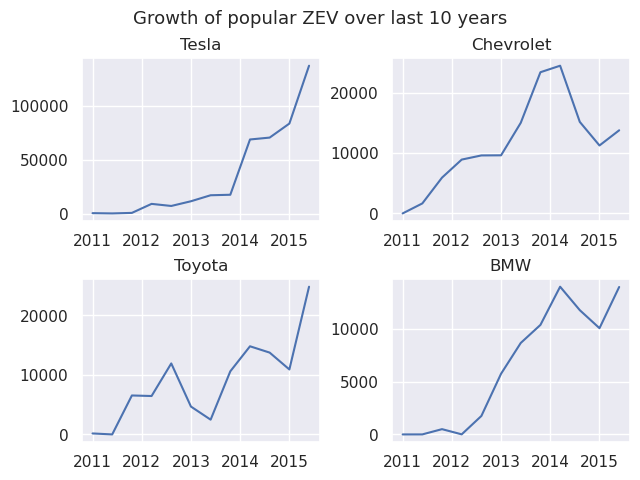

<Figure size 640x480 with 0 Axes>

In [234]:
# plotting sales comparison graphs among models
fig, ax = plt.subplots(2,2)
ax[0,0].plot(subset['Data Year'], subset['Tesla'])
ax[0,0].set_title('Tesla')
ax[0,0].set_xticklabels(subset['Data Year'])
ax[0,1].plot(subset['Data Year'], subset['Chevrolet'])
ax[0,1].set_title('Chevrolet')
ax[0,1].set_xticklabels(subset['Data Year'])
ax[1,0].plot(subset['Data Year'], subset['Toyota'])
ax[1,0].set_title('Toyota')
ax[1,0].set_xticklabels(subset['Data Year'])
ax[1,1].plot(subset['Data Year'], subset['BMW'])
ax[1,1].set_title('BMW')
ax[1,1].set_xticklabels(subset['Data Year'])
fig.suptitle('Growth of popular ZEV over last 10 years', fontsize=13)
plt.figsize = (10,8)
fig.tight_layout(pad=0.6)
plt.show()
plt.clf()

**Result and onservation:**

In the bar graphs we see the most popular ZEV vehichle sales trend over last 10 years. We observe after 2015 there is rise in the sales for all the mentioned vehicles. Also we have noticed other than Tesla, Chevrolet, Tyota and BMW had faced declining sales previous years. 

### **3.9**  **What is the most popular Tesla model sold in year 2021?**

In [235]:
tesla_sales_2021 = df_sales[(df_sales['Make'] == 'Tesla') & (df_sales['Data Year'] == 2021)]
tesla_model_sales_2021 = tesla_sales_2021.groupby('Model')['Number of Vehicles'].sum()
tesla_sales_2020 = df_sales[(df_sales['Make'] == 'Tesla') & (df_sales['Data Year'] == 2020)]
tesla_model_sales_2020 = tesla_sales_2020.groupby('Model')['Number of Vehicles'].sum()
print('Year2020:\n', tesla_model_sales_2020)
print('Year2021:\n', tesla_model_sales_2021)


Year2020:
 Model
Model 3    47740
Model S     5871
Model X     8479
Model Y    21379
Name: Number of Vehicles, dtype: int64
Year2021:
 Model
Model 3    67262
Model S     6532
Model X     2319
Model Y    61022
Name: Number of Vehicles, dtype: int64


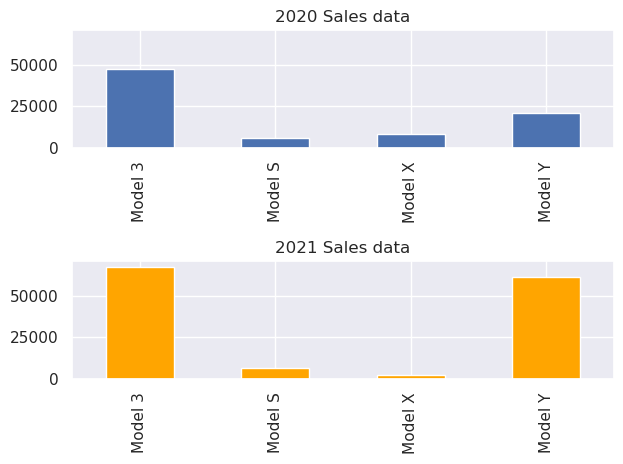

<Figure size 640x480 with 0 Axes>

In [236]:
# plotting Tesla sales data
fig, ax = plt.subplots(2,1, sharey=True)

tesla_model_sales_2020.plot(
    ax = ax[0],
    kind = 'bar'
)

tesla_model_sales_2021.plot(
    ax = ax[1],
    kind = 'bar',
    color = 'orange',
)
ax[0].set(title = '2020 Sales data', xlabel=None)
ax[1].set(title = '2021 Sales data', xlabel=None)
plt.figsize = (20,10)
fig.tight_layout()
plt.show()
plt.clf()

**Result and onservation:**

In the bar graph above shows up the sale comparison among the popular models of Tesla. It shows that Model X has less sales comparing year 2020 where as Model Y has big increase in sales and Model 3 is the mostly sold model.

### **4. Conclusions and Discussion**


In this study we focus on understanding the population distribution, sales, and charging options available for ZEV across CA, US. We observe steady increase ZEV sales over the last decade between 2010 and 2021 across CA specially in the counties of Los Angeles and San Francisco. It is therefore most of the charging facilities are also mostly available in these two counties. We also find that over the years the there is significant increase in ZEV on the road in CA  and the growth here is potentially high than any other states in the USA, despite the fact that most vehicle on road in the year 2021 was Gasoline and only 3% was on ZEV. Among ZEVs Electrical Vehicles (EVs) are the most common comparing PHEV and Hydrogen cell based vehicles. This is also reflective into the available ZEV charging facilities across CA with 55% of them are shared private while only 45% are public. An interesting observation is that even the growth of ZEV is remarkably higher in Los Angeles  but the number of available chargers are not quiet adequiet. Furthermore, Tesla is found to be most popular ZEV sold across CA but other makers like Toyota, Chevrolet, and Ford models are quickly catching up with popularity and sales. This is an indication that other ZEV makers are going to invest more in ZEV production, sales, and marketing in the coming years. In overall, our exploeratory data analysis tells us ZEVs are going to be essential part of our daily lives in the near future and still lots of infrastructure needs to be implemented to support it.  

### **5. Future Analysis**


With future works we would like to investigate how ZEV battery performance compares across different makes and models, charger installation vs sales projection, analyses of highway and regional mpg coverage, and how sales and production of ZEV are going to meet the government target of ZEV sale by 2035.

### **6. References**

1. Mckinsey Analysis, Can the automotive industry scale fast enough? May 12, 2022, Web, https://www.mckinsey.com/industries/automotive-and-assembly/our-insights/can-the-automotive-industry-scale-fast-enough
2. Primary data source: Web, https://www.energy.ca.gov/files/zev-and-infrastructure-stats-data
3. Geo data source: Web, https://geodata.lib.berkeley.edu/catalog/ark28722-s77p41 
4. https://afdc.energy.gov/
5. D. Gohlke and Y. Zhou, ​“[Assessment of Light-Duty Plug-in Electric Vehicles in the United States, 2010 – 2020, Argonne National Laboratory](https://www.osti.gov/biblio/1785708), Lemont, IL USA, ANL/ESD-21/2, 2021.
4. https://www.fueleconomy.gov/feg/download.shtml

